In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
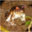

In [5]:
x_train[0]

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
classes[9]

'truck'

In [9]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

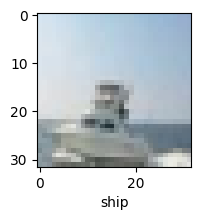

In [20]:
plot_sample(x_train, y_train, 100)

In [21]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**First Test on ANN**

In [23]:
ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.3046 - loss: 1.9335
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 93ms/step - accuracy: 0.4218 - loss: 1.6455
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.4530 - loss: 1.5529
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.4701 - loss: 1.4913
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.4948 - loss: 1.4342


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.57      0.54      0.55      1000
           1       0.43      0.82      0.56      1000
           2       0.33      0.47      0.39      1000
           3       0.39      0.21      0.27      1000
           4       0.43      0.36      0.39      1000
           5       0.37      0.44      0.40      1000
           6       0.53      0.53      0.53      1000
           7       0.68      0.44      0.53      1000
           8       0.70      0.50      0.58      1000
           9       0.56      0.42      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



**Now Applying CNN**

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [29]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3803 - loss: 1.7121
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6015 - loss: 1.1308
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.6622 - loss: 0.9730
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 44ms/step - accuracy: 0.6918 - loss: 0.8869
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - accuracy: 0.7155 - loss: 0.8180
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 51ms/step - accuracy: 0.7305 - loss: 0.7681
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7502 - loss: 0.7132
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7688 - loss: 0.6654
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7808 - loss: 0.6308
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7911 - loss: 0.5982


In [30]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7047 - loss: 0.8816


[0.9021594524383545, 0.7014999985694885]

In [31]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

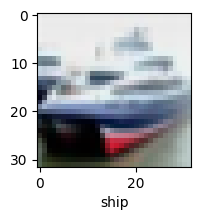

In [33]:
plot_sample(x_test, y_test, 1)

In [34]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


array([[2.93832254e-05, 1.00381330e-05, 8.50932731e-04, 8.16313684e-01,
        6.14228018e-04, 1.46047249e-01, 3.27591710e-02, 5.29815385e-04,
        2.84336903e-03, 2.10793928e-06],
       [2.83876411e-03, 6.48602545e-02, 3.03842426e-05, 2.05127581e-04,
        2.24587507e-06, 4.50749624e-08, 8.37339485e-07, 1.06885572e-07,
        9.31163430e-01, 8.98848462e-04],
       [6.24843203e-02, 1.00802325e-01, 8.59676220e-04, 2.04604641e-02,
        7.48618646e-03, 3.28899070e-04, 8.82916793e-04, 2.64337310e-03,
        7.98368514e-01, 5.68335922e-03],
       [2.65451640e-01, 2.94764601e-02, 3.64082009e-02, 5.80356047e-02,
        1.29736941e-02, 3.06762900e-04, 1.78021844e-03, 2.21711560e-03,
        5.92121243e-01, 1.22901564e-03],
       [1.73707087e-06, 4.35266747e-06, 5.52007137e-03, 7.03155622e-02,
        2.03167677e-01, 8.85005668e-03, 7.12105036e-01, 1.22292931e-06,
        3.31907650e-05, 9.81556468e-07]], dtype=float32)

In [35]:
y_classes = [np.argmax(elements) for elements in y_pred]
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
classes[y_classes[1]]

'ship'

In [37]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74      1000
           1       0.88      0.75      0.81      1000
           2       0.62      0.56      0.59      1000
           3       0.49      0.54      0.52      1000
           4       0.64      0.65      0.64      1000
           5       0.58      0.66      0.62      1000
           6       0.80      0.74      0.77      1000
           7       0.75      0.75      0.75      1000
           8       0.79      0.83      0.81      1000
           9       0.76      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [38]:
cnn.save("CIFAR10-Image-Classification.keras")